# Importing Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')

In [79]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [80]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [81]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [83]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [84]:
df.shape

(4340, 8)

In [85]:
df.ndim

2

In [86]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [87]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [88]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [89]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [90]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [91]:
df.owner.value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [92]:
df.year.unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992])

In [93]:
pd.set_option('future.no_silent_downcasting', True)

# Feature Engineering
label encoding the columns values

In [94]:
df_copy = df.copy()
df_copy.insert(df.columns.get_loc('fuel'), column='new_fuel', value=df_copy.fuel.replace({"Petrol": 0, "Diesel": 1, "CNG": 2, "LPG": 3, "Electric": 4}))
df_copy.head()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,Individual,Manual,Second Owner


In [95]:
df_copy.new_fuel.unique()

array([0, 1, 2, 3, 4], dtype=object)

In [96]:
df_copy.insert(df.columns.get_loc('seller_type')+1, column='new_seller_type', value=df_copy.seller_type.replace({"Individual": 0, "Dealer": 1, "Trustmark Dealer": 2}))
df_copy.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


In [97]:
df_copy.new_seller_type.unique()

array([0, 1, 2], dtype=object)

# Encoding and Labeling columns values by package

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
new_df = df_copy.copy()

In [100]:
new_df['fuel'] = LabelEncoder().fit_transform(df_copy.fuel)

In [101]:
new_df['fuel'].unique()

array([4, 1, 0, 3, 2])

using one-hot encoding

In [102]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [103]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(new_df)
new_df

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,4,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,4,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,4,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,0,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,0,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,0,4,0,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,0,Individual,Manual,First Owner


In [104]:
df['seller_type'] = LabelEncoder().fit_transform(df.seller_type)
df['fuel'] = LabelEncoder().fit_transform(df.fuel)
df['transmission'] = LabelEncoder().fit_transform(df.transmission)
df['owner'] = LabelEncoder().fit_transform(df.owner)

In [105]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [106]:
df['no_of_years'] = 2024 - df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,12
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,10


In [107]:
df.rename({"selling_price": "current_price"}, axis='columns', inplace=True)
df.drop(['name', 'year'], axis='columns', inplace=True)
df.head()

,current_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,17
1,135000,50000,4,1,1,0,17
2,600000,100000,1,1,1,0,12
3,250000,46000,4,1,1,0,7
4,450000,141000,1,1,1,2,10


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   current_price  4340 non-null   int64
 1   km_driven      4340 non-null   int64
 2   fuel           4340 non-null   int64
 3   seller_type    4340 non-null   int64
 4   transmission   4340 non-null   int64
 5   owner          4340 non-null   int64
 6   no_of_years    4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [109]:
df.corr()

,current_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
current_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_years,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


<Axes: >

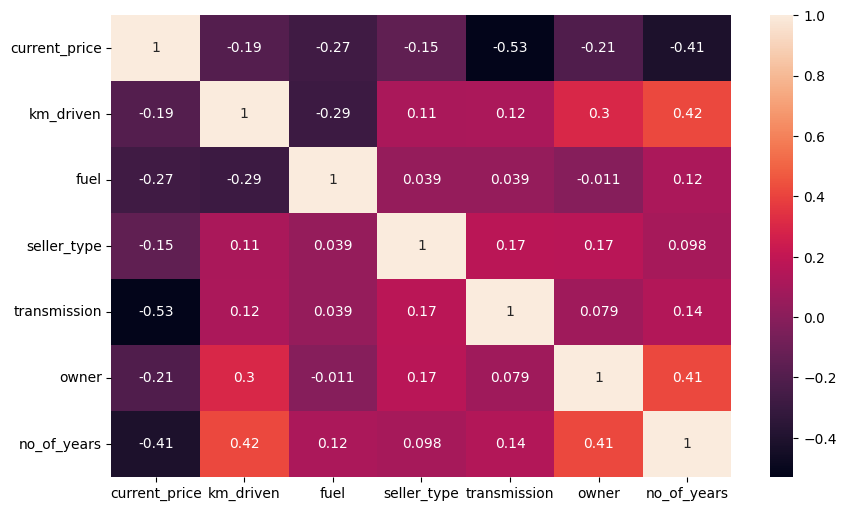

In [110]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)

<Axes: >

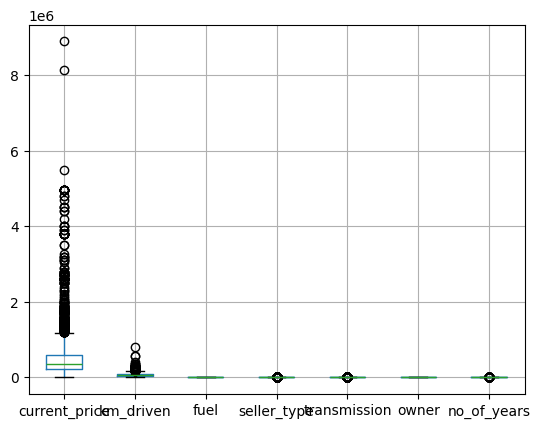

In [111]:
df.boxplot()

# selecting the features and target

In [112]:
x = np.array(df.drop('current_price', axis=1))
y = np.array(df['current_price'])

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [118]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [119]:
y_pred = regressor.predict(x_test)

# Testing the model

In [120]:
target = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
target.head()

,Actual,Predicted
0,355000,325000.0
1,250000,400000.0
2,875000,1000000.0
3,212000,195000.0
4,95000,100000.0


Text(0.5, 1.0, 'Decision Tree Regression')

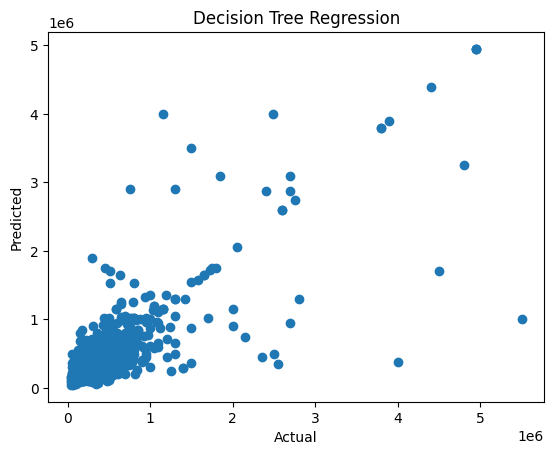

In [121]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression')

ValueError: x and y must be the same size

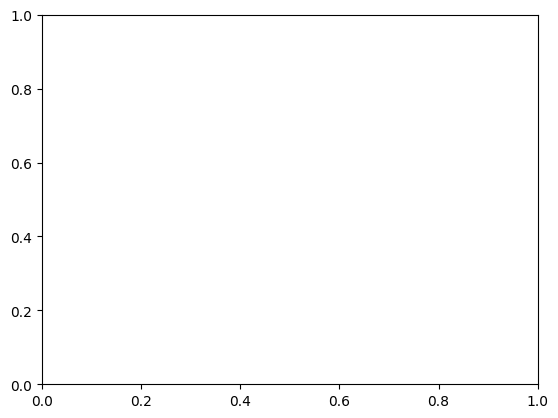

In [123]:
plt.scatter(x_test, y_pred, color='red')
plt.scatter(x_test, y_test, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression')

# Performance Matrix

In [124]:
r2_score(y_test, y_pred)

0.5954784864115161